#Modeling Monte Carlo Markov Chain Homework

####Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

####Metropolis Function

1) start with a prosed distribution
2)

In [ ]:
def metropolisHastings(func, draws=10000):
  trace = np.zeros(draws)
  old_x = func.mean()
  old_prob = func.pdf(old_x)

  proposalDist = np.random.normal(0, func.mean(), draws)
  for i in range(draws):
    candidate = oldx = proposalDist[i]
    new_prob = func.pdf(candidate)

    acceptance = new_prob / old_prob # acceptance rate
    # Rule of thumb: When we are doing random walk Metropolis-Hastings, we want
    # an acceptance rate of 23% to 50%
    # Too low of an acceptance rate means we are taking too large of steps and
    # and many proposals hve low probabilty of being accepted
    # Too small of steps means it will accept candidates often but it will take
    # a long time to fully explore the posterior distribution
    
    # Correction steps: At each step we check whether we keep or reject the candidate
    if acceptance >= np.random.random(): # Usually you would check if acceptance is > 1
      trace[i] = candidate               # but in this case we see acceptance > 1 implies acceptance > np.random.random()
      old_x = candidate
      old_prob = new_prob
    else:
      trace[i] = old_x #reject candidate
  return trace

####Beta (example from the book)

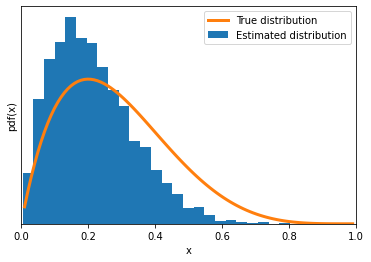

In [ ]:
np.random.seed(3)
func = stats.beta(2, 5)
trace = metropolisHastings(func=func)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.xlim(0, 1)
plt.plot(x, y, 'C1-', lw=3, label='True distribution')
plt.hist(trace[trace > 0], bins=25, density=True, label='Estimated distribution')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.yticks([])
plt.legend();

####Inverse Gamma

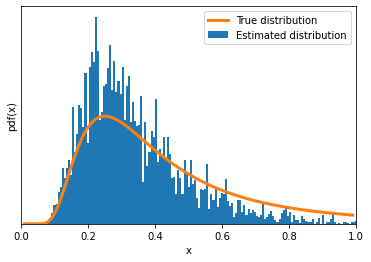

In [ ]:
np.random.seed(305) # Last 3 digits of my EMPLID
func = stats.invgamma(3) # Mean = 3
trace = metropolisHastings(func=func)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.xlim(0, 1)
plt.plot(x, y, 'C1-', lw=3, label='True distribution')
plt.hist(trace[trace > 0], bins=250, density=True, label='Estimated distribution') # I used 250 bins
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.yticks([])
plt.legend();

####Normal

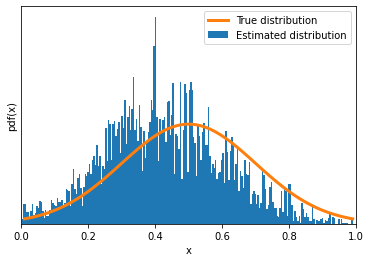

In [ ]:
np.random.seed(305) # Last 3 digits of my EMPLID
func = stats.norm(.5, .2)
trace = metropolisHastings(func=func)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.xlim(0, 1)
plt.plot(x, y, 'C1-', lw=3, label='True distribution')
plt.hist(trace[trace > 0], bins=250, density=True, label='Estimated distribution') # I used 250 bins
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.yticks([])
plt.legend();

####Gamma

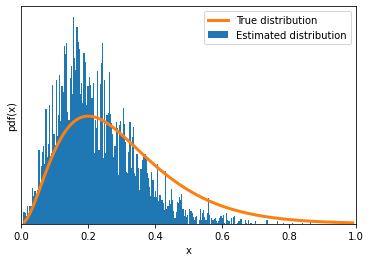

In [ ]:
np.random.seed(305) # Last 3 digits of my EMPLID
func = stats.gamma(3, scale = .1)
trace = metropolisHastings(func=func)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.xlim(0, 1)
plt.plot(x, y, 'C1-', lw=3, label='True distribution')
plt.hist(trace[trace > 0], bins=250, density=True, label='Estimated distribution') # I used 250 bins
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.yticks([])
plt.legend();